### Подготовка данных


Скачаем датасет **Титаник** в папку `data` при помощи платформы **Kaggle**: https://www.kaggle.com/c/titanic/data

Импортируем все необходимые библиотеки

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Загрузим датасет из CSV

In [74]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Конкатенируем `train_data` и `test_data` в один DataFrame

In [75]:
data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

Посмотрим размерности таблиц

In [76]:
len(train_data), len(test_data), len(data)

(891, 418, 1309)

Посмотрим, есть ли у нас дубликаты по ключу `PassengerId`

In [77]:
data = data.drop_duplicates(subset='PassengerId', keep='first')

In [78]:
len(data)

1309

Размерность таблицы не изменилась, значит, дубликатов не было

Посмотрим получившуюся таблицу

In [79]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Посмотрим на типы всех столбцов `data`

In [80]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Преобразуем столбы `Survived`, `Pclass`, `Sex`, `Embarked` в категориальный тип

In [81]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

In [82]:
data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

### Анализ таблицы

Посмотрим на базовую статистику таблицы `data`

In [83]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881138,0.498854,0.385027,33.295479
std,378.020061,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


Визуализируем базовую статистику таблицы

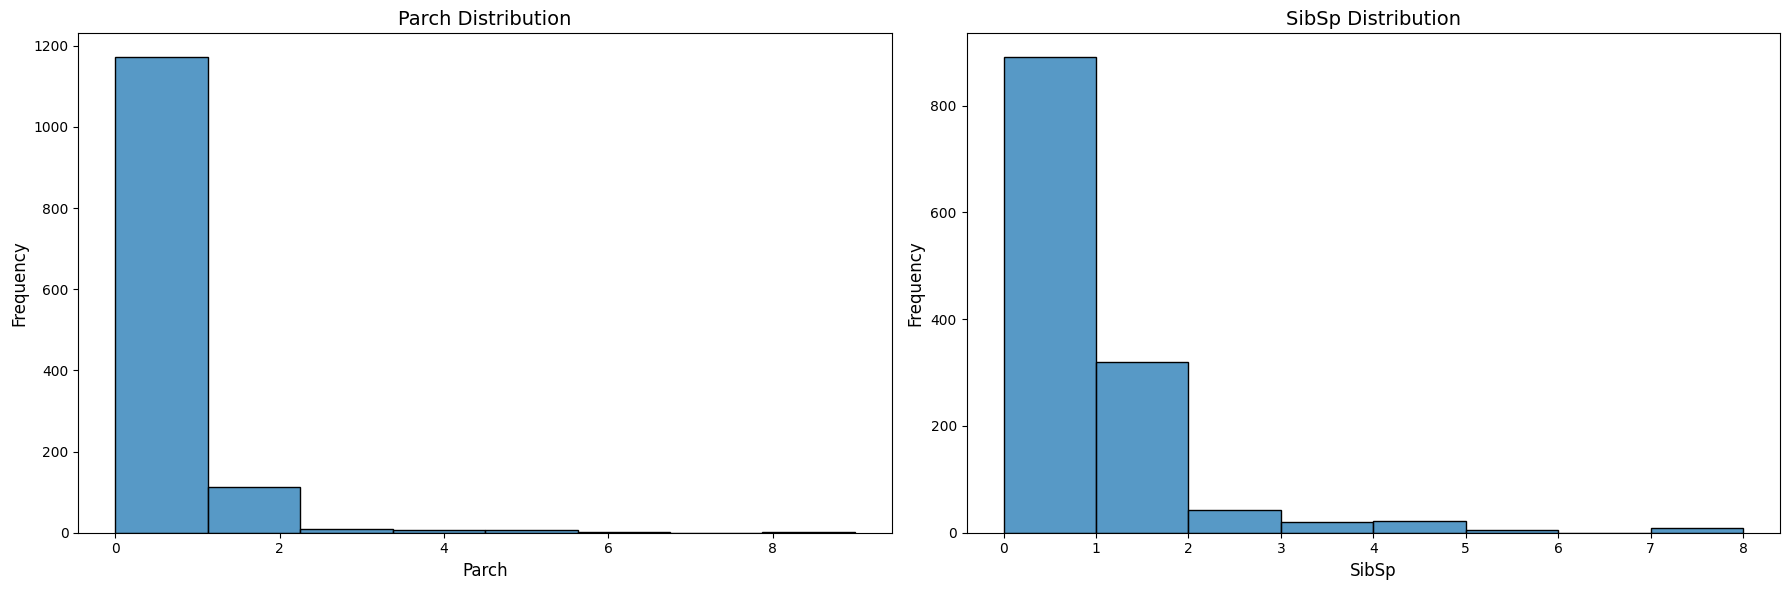

In [84]:
# Создание холста для нескольких графиков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Гистограмма для Parch (Родители/дети)
sns.histplot(data['Parch'], kde=False, bins=8, ax=axes[0])
axes[0].set_title('Parch Distribution', fontsize=14)
axes[0].set_xlabel('Parch', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Гистограмма для SibSp (Братья/сестры и супруги)
sns.histplot(data['SibSp'], kde=False, bins=8, ax=axes[1])
axes[1].set_title('SibSp Distribution', fontsize=14)
axes[1].set_xlabel('SibSp', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


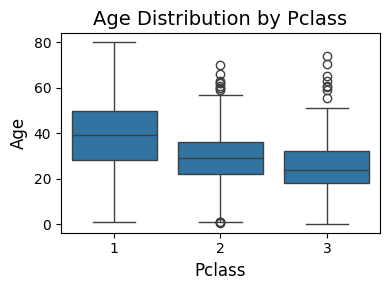

In [85]:
# Создание холста для одного графика
plt.figure(figsize=(4, 3))

# Коробчатая диаграмма по возрасту и классам
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Age Distribution by Pclass', fontsize=14)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Показать график
plt.tight_layout()
plt.show()

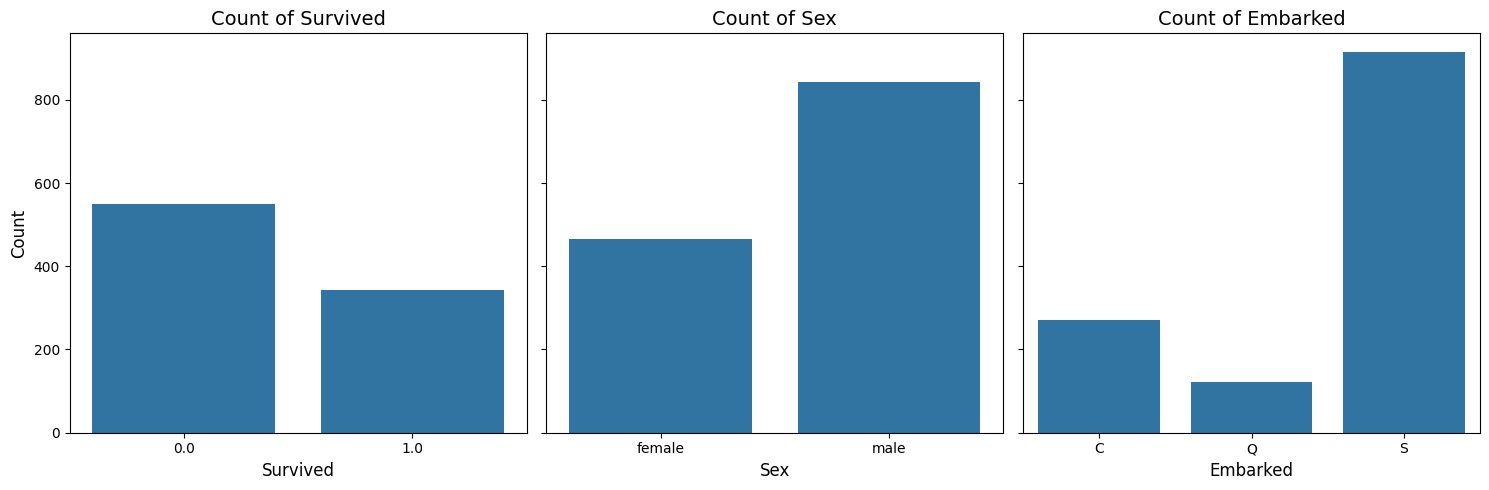

In [86]:

# Список категориальных колонок
columns = ['Survived', 'Sex', 'Embarked']

# Создание холста для графиков
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5), sharey=True)

# Создание графиков для каждой категории
for i, col in enumerate(columns):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


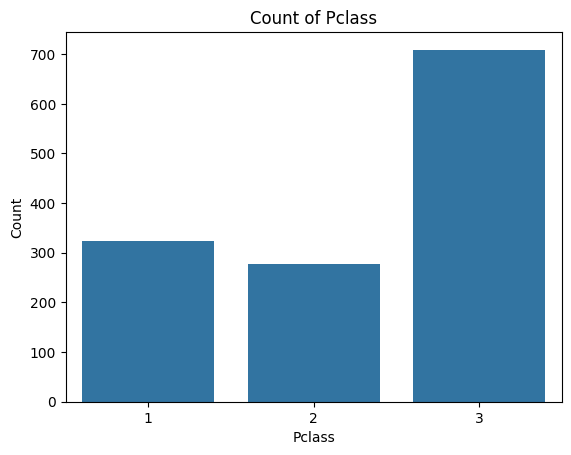

In [87]:
sns.countplot(data=data, x='Pclass')
plt.title('Count of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


- В каком классе было больше всего пассажиров?
<br>По графику видно, что больше всего пассажиров в классе S 

Сгруппируем таблицу в два уровня: класс и пол, по среднему значению возраста. Посмотрим кто из возможных комбинаций самый юный, кто самый взрослый

In [88]:
group_data = data.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index().sort_values(by='Age', ascending=True)
group_data

/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_66578/475554249.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Pclass,Sex,Age
4,3,female,22.185329
5,3,male,25.962264
2,2,female,27.499223
3,2,male,30.815380
0,1,female,37.037594
1,1,male,41.029272


- Самыми юными являются Женщины из 3 класса
- Самыми взрослыми являются Мужчины из 1 класса

Посмотрим насколько отличаются эти значения

In [89]:
group_data['Age'].max() - group_data['Age'].min()

18.843942575810384

Отоберем только выживших пассажиров с фамилией, начинающейся на “K”. Отсортируем их по убыванию стоимости билета. Посмотрим, кто заплатил больше всех, кто меньше всех

In [90]:
survived_data = data[(data['Survived'] == 1) & (data['Name'].str.startswith('K', na=False))]
survived_data.sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1.0,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
457,458,1.0,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
316,317,1.0,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
184,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
706,707,1.0,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
691,692,1.0,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
303,304,1.0,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
300,301,1.0,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
573,574,1.0,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q


- Больше всех заплатил Kimball, Mr. Edwin Nelson Jr
- Меньше всех заплатил Kelly, Miss. Mary

Посмотрим, какое максимальное количество родных было с выжившим пассажиром

`SibSp` используется для обозначения количества у человека братьев, сестер и супругов.
<br>`Parch` используется для обозначения количества у человека родителей и детей.

In [91]:
family_data = data[data['Survived'] == 1]['SibSp'] + data[data['Survived'] == 1]['Parch']
family_data.max()

6

Посчитаем среднюю стоимость билета пассажиров, для которых указана каюта (Cabin) и для тех, у кого она не указана. Посмотрим, во сколько раз они отличаются

In [92]:
# Разделим данные на две группы
with_cabin = data[data['Cabin'].notna()]  # Пассажиры с указанной каютой
without_cabin = data[data['Cabin'].isna()]  # Пассажиры без указанной каюты

len(with_cabin), len(without_cabin)

(295, 1014)

In [93]:
# Рассчитаем среднюю стоимость билета для каждой группы
avg_fare_with_cabin = with_cabin['Fare'].mean()
avg_fare_without_cabin = without_cabin['Fare'].mean()

avg_fare_with_cabin, avg_fare_without_cabin

(81.92899830508475, 19.132707206317864)

In [94]:
# Рассчитаем, во сколько раз отличаются средние стоимости
avg_fare_with_cabin / avg_fare_without_cabin

4.282143526350037

### Визуализация

Поработаем с `Seaborn` и `Plotly`

| №  | График                                                 | Тип графика             | Библиотека        |
|----|--------------------------------------------------------|-------------------------|-------------------|
| 1  | Точечный график (Scatter plot)                         | Интерактивный           | Plotly            |
| 2  | Отображение распределения (Violin plot)                | Неинтерактивный         | Seaborn           |
| 3  | Гистограмма (Histogram)                                | Неинтерактивный         | Seaborn           |
| 4  | Столбчатая диаграмма (Bar chart)                       | Интерактивный           | Plotly            |
| 5  | Горизонтальная столбчатая диаграмма (Horizontal bar)   | Интерактивный           | Plotly            |
| 6  | Круговая диаграмма (Pie chart)                         | Интерактивный           | Plotly            |
| 7  | Коробчатая диаграмма (Box chart)                       | Неинтерактивный         | Seaborn           |
| 8  | Солнечный график (Sunburst chart)                      | Интерактивный           | Plotly            |
| 9  | 3D точечный график (3D scatter plot)                   | Неинтерактивный         | Plotly            |
| 10 | Тепловая карта (Heatmap)                               | Неинтерактивный         | Seaborn           |
| 11 | Линейный график (Linear)                               | Неинтерактивный         | Seaborn           |
| 12 | Линейный график (Linear)                               | Неинтерактивный         | Seaborn           |
| 13 | Линейный график (Linear with several lines)            | Неинтерактивный         | Seaborn           |


1. Scatter plot (Точечный график)

In [95]:
# Scatter plot для возраста и стоимости билета
fig = px.scatter(data, x='Age', y='Fare', title='Age vs Fare Scatter Plot', labels={'Age': 'Age', 'Fare': 'Fare'})
fig.show()


2. Violin plot (отображение распределения)

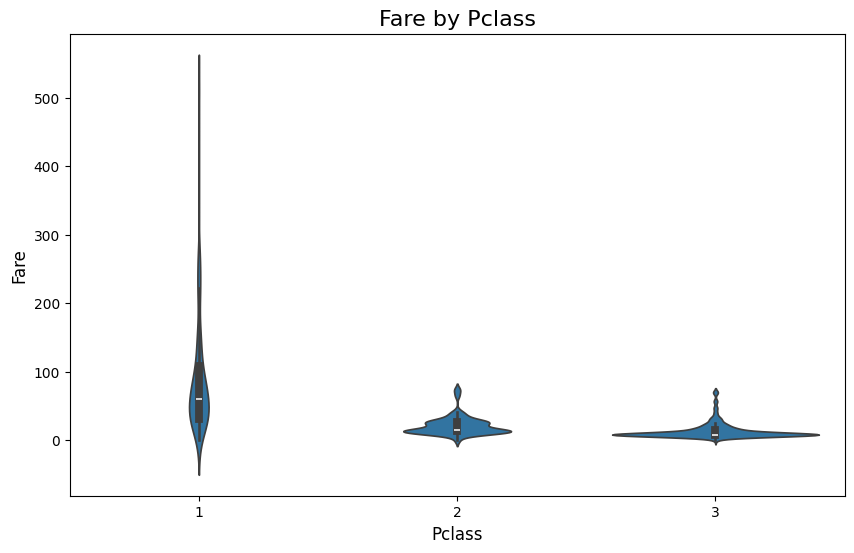

In [96]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Pclass', y='Fare')
plt.title('Fare by Pclass', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.show()


3. Histogram (Гистограмма)

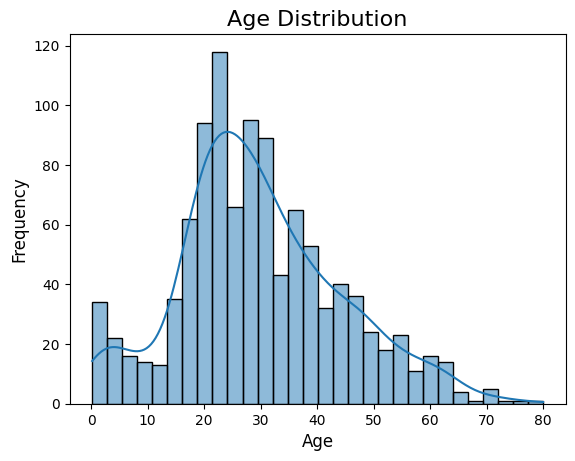

In [97]:
sns.histplot(data['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

4. Bar chart (Столбчатая диаграмма)

In [98]:
# Подсчитываем количество для каждой комбинации 'Survived' и 'Sex'
survival_counts_by_gender = data.groupby(['Survived', 'Sex']).size().reset_index(name='Count')

# Создаем столбчатую диаграмму
fig = px.bar(
    survival_counts_by_gender, 
    x='Sex', 
    y='Count',
    color='Survived',
    barmode='group',
    title='Survival Count by Gender',
    labels={'Sex': 'Gender', 'Count': 'Count', 'Survived': 'Survived'},
    color_discrete_map={0: 'red', 1: 'green'}  # Красный для невыживших, зеленый для выживших
)
fig.show()

/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_66578/3338824584.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



5. Horizontal bar chart (Горизонтальная столбчатая диаграмма)

In [99]:
fig = px.bar(data, x=data['Pclass'].value_counts().values, y=data['Pclass'].value_counts().index, orientation='h',
             title='Pclass Distribution', labels={'x': 'Count', 'y': 'Pclass'})
fig.show()


6. Pie chart (Круговая диаграмма)

In [100]:
fig = px.pie(data, names='Survived', title='Survival Distribution')
fig.show()


7. Box chart (Коробчатая диаграмма)

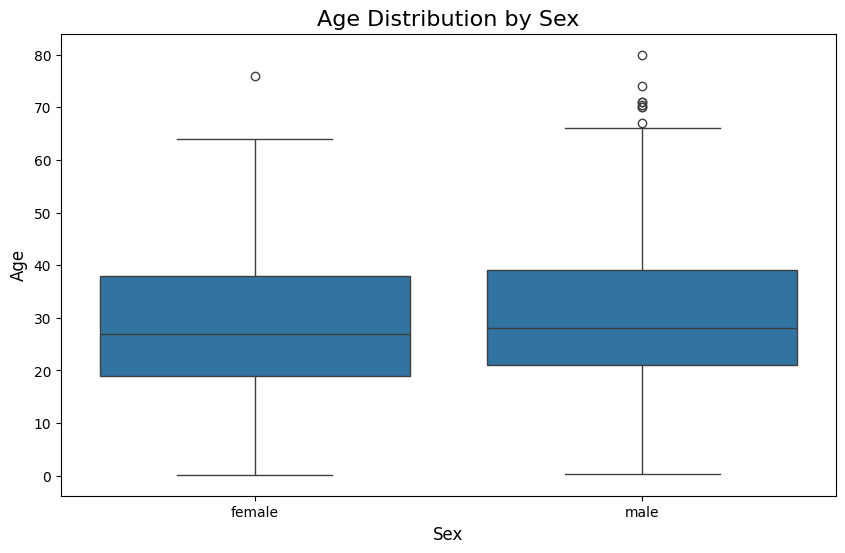

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=data)
plt.title('Age Distribution by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

8. Sunburst chart (Солнечный график)

In [102]:
# Удаляем строки с NaN в столбце 'Survived'
data_clean = data.dropna(subset=['Survived'])

# Создаем Sunburst диаграмму
fig = px.sunburst(data_clean, path=['Survived', 'Sex', 'Pclass'], title='Survival, Sex, and Pclass Distribution')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

9. 3D scatter plot (3D точечный график)

In [103]:
fig = px.scatter_3d(data, x='Age', y='Fare', z='Pclass', color='Survived', title='3D Scatter: Age, Fare, and Pclass')
fig.show()

10. Heatmap (Тепловая карта)

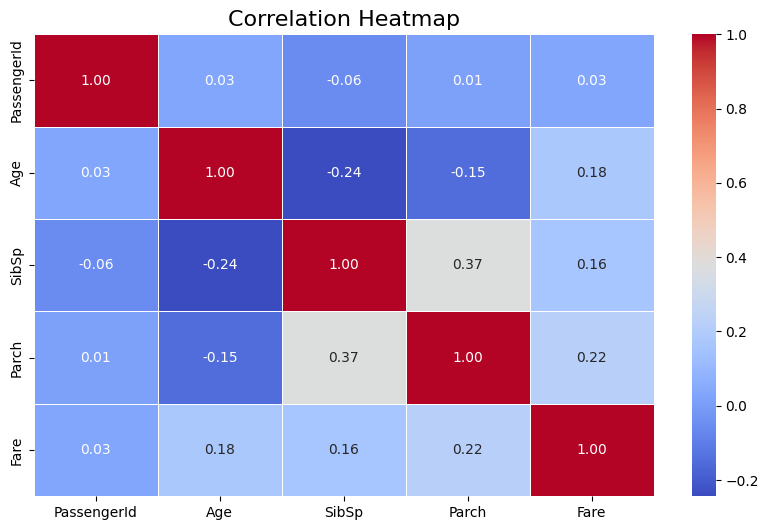

In [104]:
# Отбираем только числовые столбцы
numeric_data = data.select_dtypes(include=['number'])

# Строим тепловую карту корреляции
plt.figure(figsize=(10, 6))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

11. Linear (Линейный график)

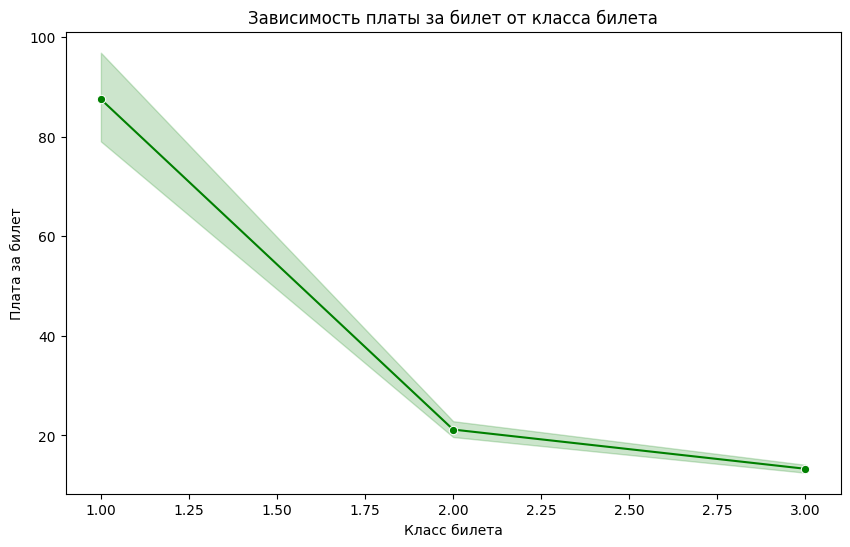

In [105]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Pclass', y='Fare', data=data, marker='o', linestyle='-', color='green')
plt.title('Зависимость платы за билет от класса билета')
plt.xlabel('Класс билета')
plt.ylabel('Плата за билет')
plt.show()


12. Linear (Линейный график)

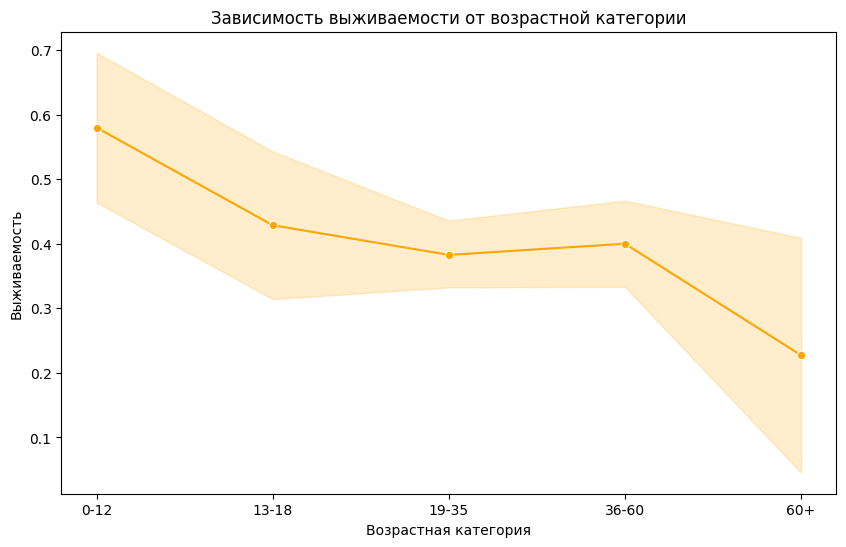

In [106]:
data['AgeCategory'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['0-12', '13-18', '19-35', '36-60', '60+'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='AgeCategory', y='Survived', data=data, marker='o', linestyle='-', color='orange')
plt.title('Зависимость выживаемости от возрастной категории')
plt.xlabel('Возрастная категория')
plt.ylabel('Выживаемость')
plt.gca().invert_yaxis()
plt.show()


/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_66578/224443716.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



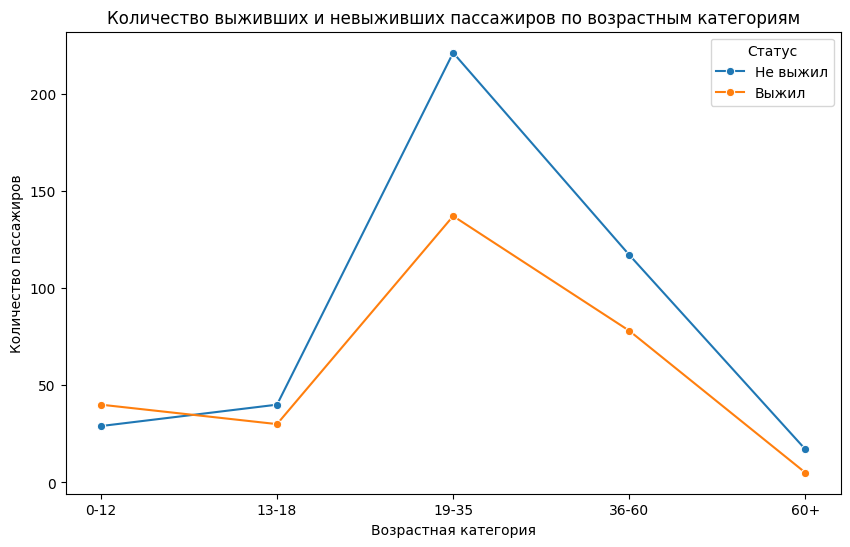

In [107]:
survival_count = data.groupby('AgeCategory')['Survived'].value_counts().unstack().fillna(0)
survival_count.columns = ['Не выжил', 'Выжил']
survival_count_long = survival_count.reset_index().melt(id_vars="AgeCategory", value_vars=['Не выжил', 'Выжил'],
                                                        var_name='Статус', value_name='Количество')

plt.figure(figsize=(10, 6))
sns.lineplot(x='AgeCategory', y='Количество', hue='Статус', data=survival_count_long, marker='o')
plt.title('Количество выживших и невыживших пассажиров по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество пассажиров')
plt.legend(title='Статус')
plt.show()


### [Sankey Diagram](https://plotly.com/python/sankey-diagram/) в Plotly на данных датасета

In [108]:
import plotly.graph_objects as go

# Подсчитываем количество для каждой комбинации (Survived, Sex)
sankey_data = data.groupby(['Survived', 'Sex']).size().reset_index(name='Count')

# Создаем словари для источников, целей и значений
labels = ['Survived', 'Not Survived', 'Male', 'Female']  # Метки для диаграммы
sources = [0, 0, 1, 1]  # Источник (0 = Survived, 1 = Not Survived)
targets = [2, 3, 2, 3]  # Цели (2 = Male, 3 = Female)
values = sankey_data['Count'].tolist()  # Значения (потоки)

# Создаем Sankey диаграмму
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,  # Отступ между узлами
        thickness=20,  # Толщина узлов
        line=dict(color="black", width=0.5),  # Черные линии вокруг узлов
        label=labels  # Метки для узлов
    ),
    link=dict(
        source=sources,  # Источник потока
        target=targets,  # Цель потока
        value=values,  # Значение потока
        color=["blue", "blue", "red", "red"]  # Цвета для потоков
    )
))

fig.update_layout(title="Sankey Diagram: Survival and Sex Distribution", font_size=12)
fig.show()


/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_66578/2763982697.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

